# Step 1. 학습 데이터 삽입
------------------------------------------------------

In [15]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

#n_samples  : number of samples
#shuffle    : True or False (default=True)
#noise      : Standard deviation of Gaussian noise (default=None)

# Step 2. 모델 학습 - polynoimal features
(비선형 SVM 분류)
------------------------------------------------------

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

#훈련
polynomial_svm_clf = Pipeline([
("poly_features", PolynomialFeatures(degree=3)), #3차식까지 자동으로 조합해줌
("scaler", StandardScaler()), #스케일러 맞춰줌
("svm_Clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

C:\Users\woojung\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_Clf', LinearSVC(C=10, loss='hinge'))])

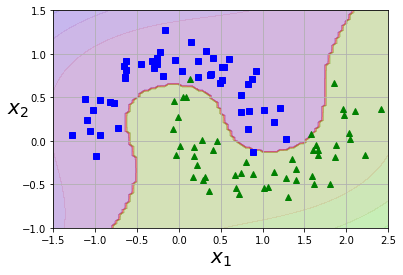

In [18]:
import numpy as np
from matplotlib import pyplot as plt

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)#axes[0]부터 axes[1]까지 100개로 이루어진 숫자들 
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s) #표현할 수 있는 모든 배열조합 
    X = np.c_[x0.ravel(), x1.ravel()]# ravel 1차원 배열로 핀다. 
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

# 다항식 커널

In [21]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) 

#coef0는 모델이 높은 차수와 낮은 차수에 얼마나 영향을 끼치는지 정할 수 있다. 
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

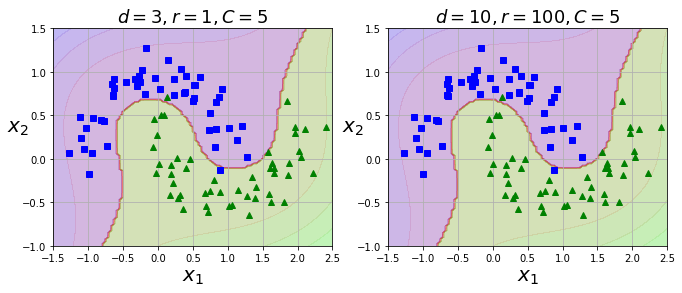

In [25]:
#시각화
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)


plt.subplot(122)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.show()

# 가우시안 RBF 커널
#### 커널 기법이란 데이터를 고차원적으로 바꿔서 사상해주는 것 ( 필요한 성질 의외는 버리는것)
###### rbf 뿐만 아니라 sigmoid, Polynomial 등등의 커널이 있지만, 가우시안 RBF 커널이 제일 좋음
###### Rbf 커널은 gamma 라는 하이퍼파라미터가 있는데 각각의 샘플 데이터의 영향력을 뜻함
###### rbf 는 종 모양으로 그래프가 만들어지는데 gamma 가 작아지면 영향력이 커지고 커지면 작아지는 반비례 관계 

In [26]:
rbf_kernel = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

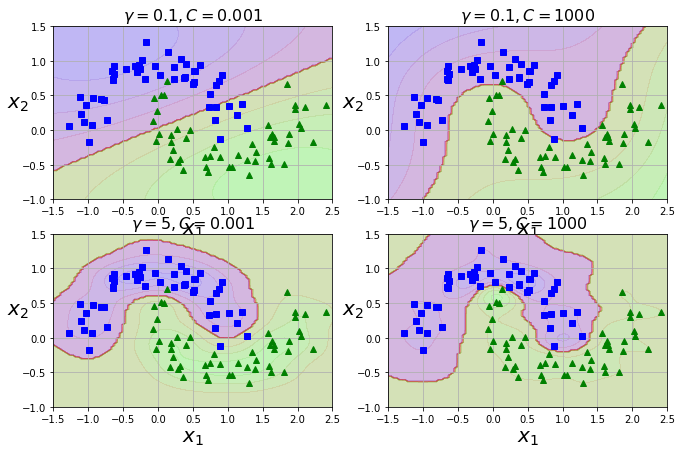

In [29]:
#시각화
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)


plt.show()

# SVM 회귀

In [31]:
from sklearn.svm import SVR #회귀는 SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

# Linear SVM 모델의 학습과 실행

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs

#Data Load
X, y = make_blobs(n_samples=40, centers=2, random_state=20)

In [7]:
#SVM이 지원하는 선형 분류와 비선형분류 중에 선형 모델에
#비선형 모델에 대한 kernel 에는 rbf와 poly가 존재
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [9]:
newData = [[3,4]]
print(clf.predict(newData))

[0]


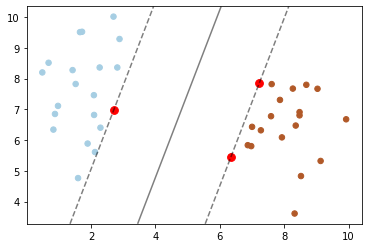

In [10]:
#시각화
#샘플 데이터와 초평면(Hyper-Plane), 지지벡터(Support Vector)를 그래프에 표시하는 코드

# 샘플 데이터 표현
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)
# 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
# 지지벡터(Support Vector) 표현
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
plt.show()